In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

Nome: Bernardo Dutra Lemos  
Matricula: 2022043949

# Aplicação de Equações Diferenciais na área da computação/dados

- Esse trabalho visa mostrar como a decomposiçao de Fourier de uma funçao, ou sinal, pode ajudar muito na extração de informaçoes acerca da mesma e até mesmo trata-la através de filtros.

## Visualizando FFT

- Será um sinal resultado da soma de 3 ondas, sendo elas, seno, cosseno e tangente, cada uma delas em frequencias diferentes(1,3,8 em Hz respectivamente).
- O objetivo da prática será ,mostrar como é possivel usar a transformada de fourier para caracterização de uma onda e outras utilidades.

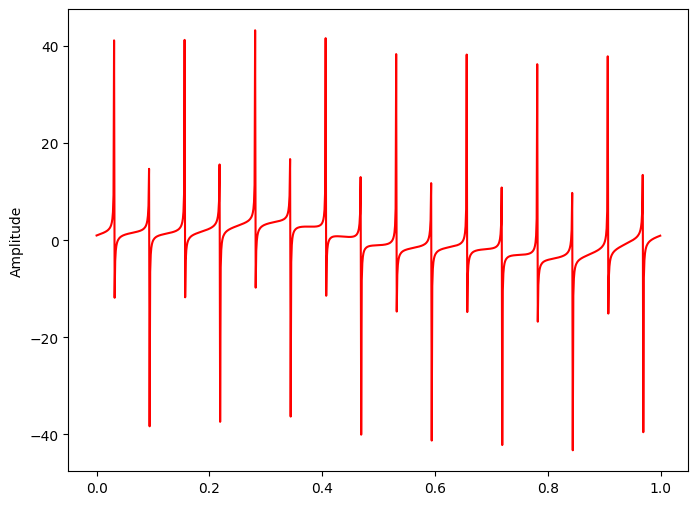

In [18]:

sr = 1000
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 3
x += np.cos(2*np.pi*freq*t)

freq = 8   
x += 0.5* np.tan(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

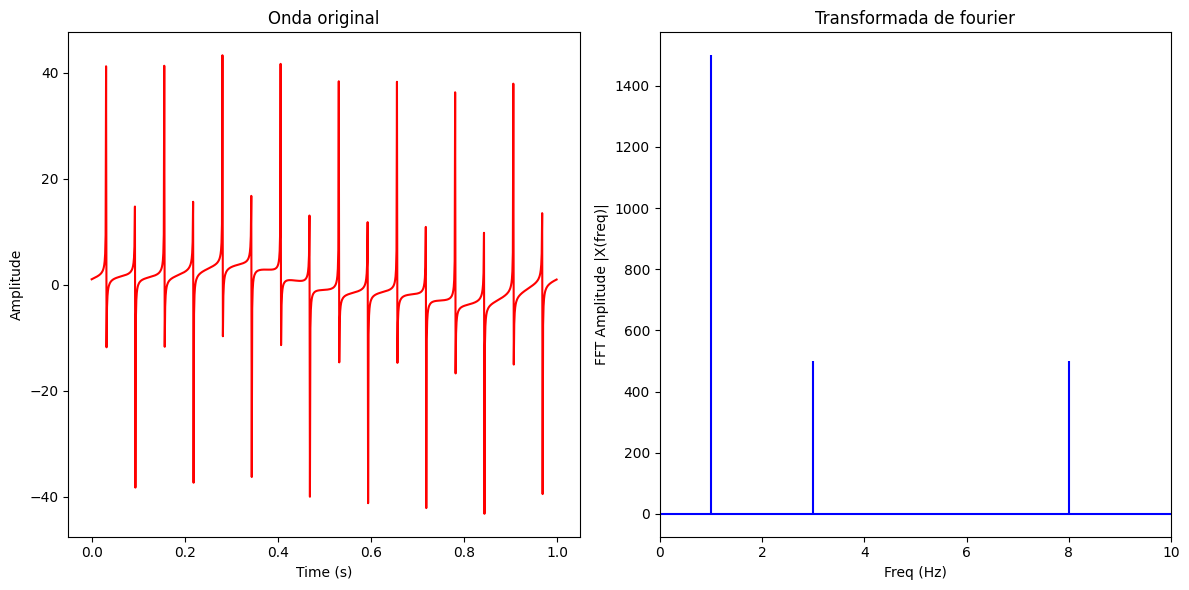

In [19]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primeiro subplot
ax2.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('FFT Amplitude |X(freq)|')
ax2.set_title('Transformada de fourier')
ax2.set_xlim(0, 10)

# Segundo subplot
ax1.set_title('Onda original')
ax1.plot(t, np.fft.ifft(X).real, 'r')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Ajustando o layout
fig.tight_layout()

# Mostrando a figura
plt.show()

- Podemos ver como o espectro de fourier nos diz sobre a presença de cada tipo de frequência na onda original(eixo x) e sua intensidade(eixo y).

### Filtragem

-  Aqui mostrarei que é possivel usar as informaçoes do espectro para realizar uma filtragem do sinal, seja ela passa alta ou passa baixa.

In [20]:
sig_fft = fft(x)
sig_fft_filtered = sig_fft.copy()

# obtendo as frequências
freq = fftfreq(len(x), d=1./1000)

# define a frequência de corte
cut_off = 7

# filtro passa-baixa no domínio da frequência
# zerando as amplitudes das frequências maiores que a frequência de corte
# mantendo as frequências menores que a frequência de corte
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# recuperando o sinal filtrado no domínio do tempo
filtered = ifft(sig_fft_filtered)

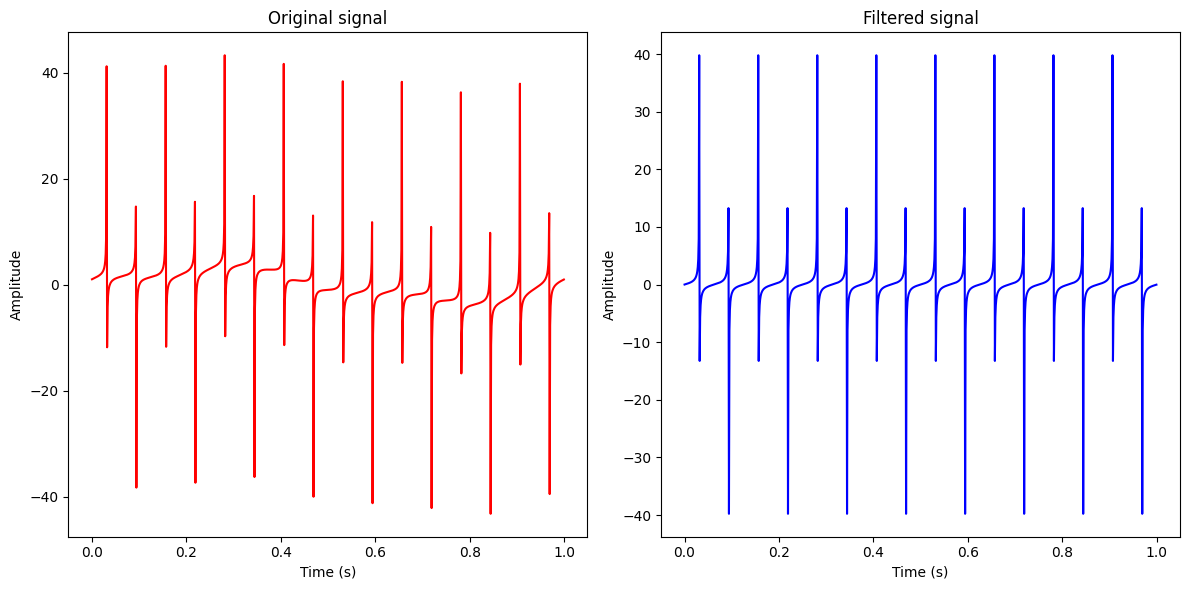

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# plot x and filtered signal
ax[0].plot(t, x, 'r')
ax[0].set_title('Original signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(t, filtered, 'b')
ax[1].set_title('Filtered signal')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()

Text(0, 0.5, 'FFT Amplitude')

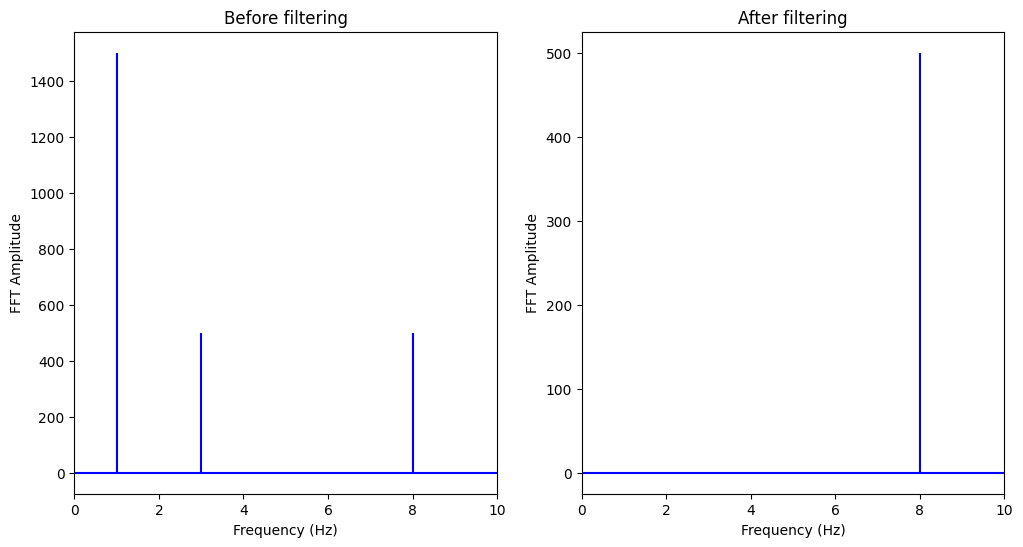

In [22]:
## plot the FFT amplitude before and after
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].stem(freq, np.abs(sig_fft), 'b', markerfmt=" ", basefmt="-b")
ax[0].set_title('Before filtering')
ax[0].set_xlim(0, 10)
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('FFT Amplitude')
ax[1].stem(freq, np.abs(sig_fft_filtered), 'b', markerfmt=" ", basefmt="-b")
ax[1].set_title('After filtering')
ax[1].set_xlim(0, 10)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FFT Amplitude')


- No exemplo dado, fizemos um filtro passa baixa, onde filtramos todos os sinal com frequência menor que 2, ou seja,<br> sobrou apenas a onda referente ao
seno, seria possivel fazer isso para as demais.

### Remoçao de ruido usando fft

- Nesse Exemplo adicionaremos ruido artificial

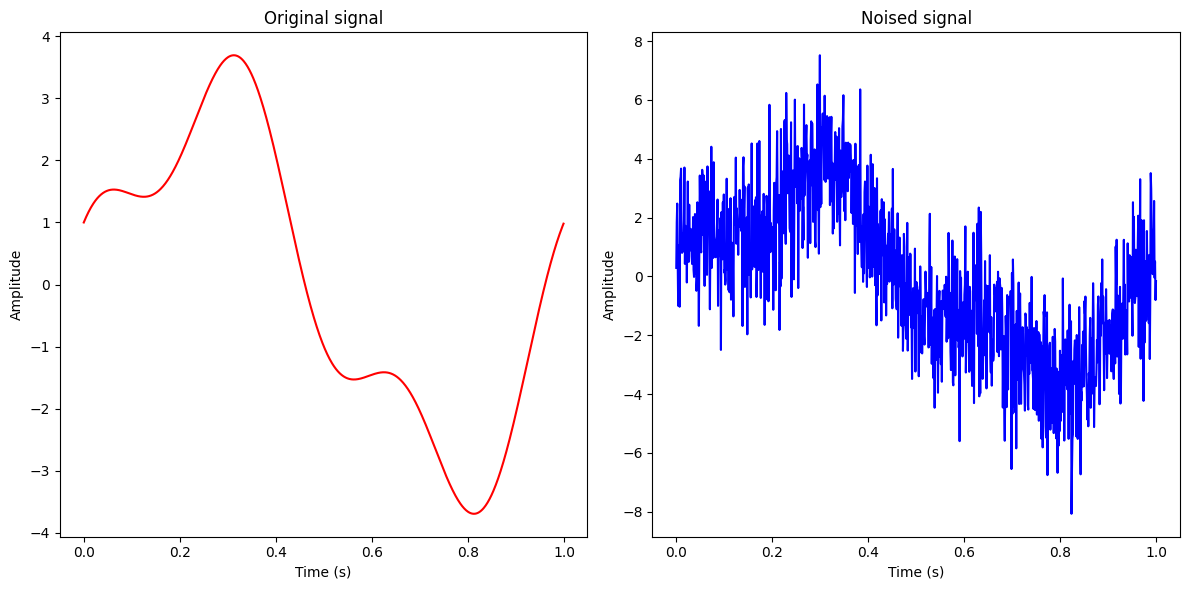

In [49]:
# sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 3
x += np.cos(2*np.pi*freq*t)


# criar um ruido normal
noise = 1.5*np.random.normal(0,1, len(x))
noised_signal = x + noise

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(t, x, 'r')
ax[0].set_title('Original signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(t, noised_signal, 'b')
ax[1].set_title('Noised signal')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()

plt.show()

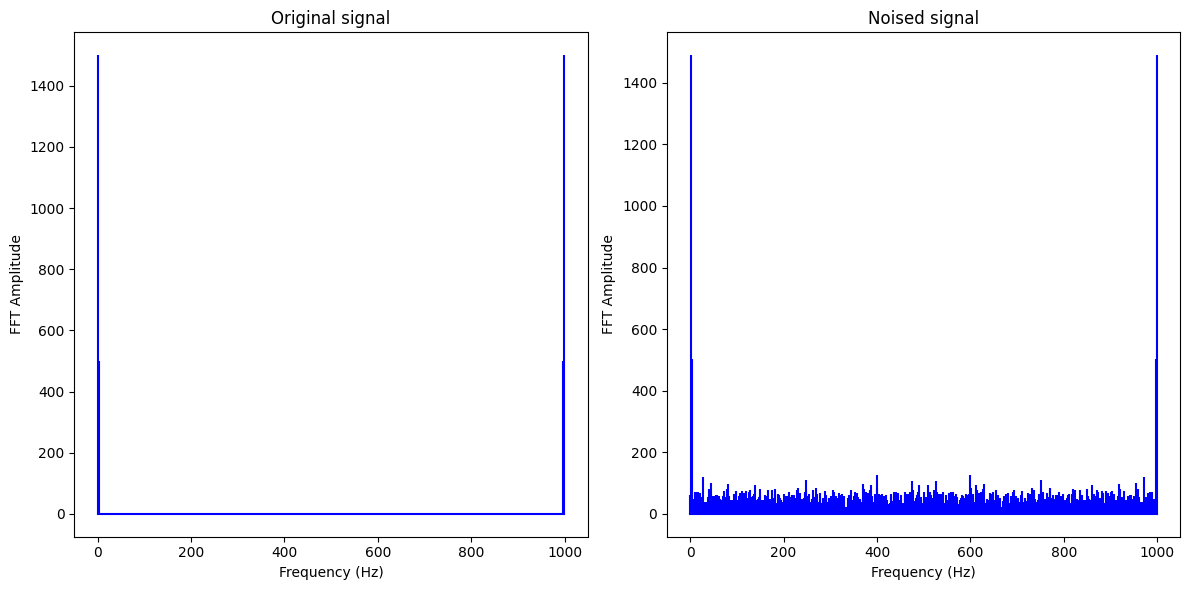

In [50]:
X = fft(x)
X_noised = fft(noised_signal)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
ax[0].set_title('Original signal')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('FFT Amplitude')
ax[1].stem(freq, np.abs(X_noised), 'b', markerfmt=" ", basefmt="-b")
ax[1].set_title('Noised signal')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

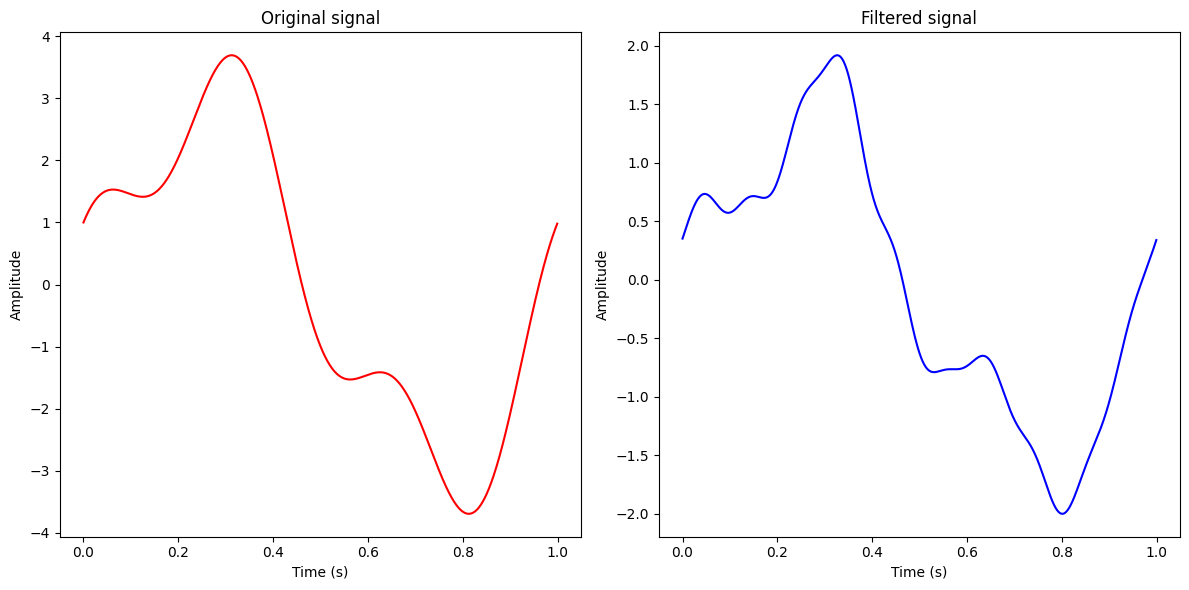

In [52]:
# filtro passa-baixa no domínio da frequência
# zerando as amplitudes das frequências maiores que a frequência de corte
# mantendo as frequências menores que a frequência de corte
cut_off = 10
X_noised[np.abs(freq) > cut_off] = 0

# recuperando o sinal filtrado no domínio do tempo
filtered = ifft(X_noised)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# plot x and filtered signal
ax[0].plot(t, x, 'r')
ax[0].set_title('Original signal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(t, filtered, 'b')
ax[1].set_title('Filtered signal')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()

- Nesse caso, sabiamos exatamente quais as frequencias da onda original, mas em casos reais onde pegamos sinais de sensores não sabemos exatamente o que é informação e o que é ruido, mas geralmente os ruidos estao atrelados a altas frequências e nesse exemplo pudemos recuperar um sinal ruidoso, a um sinal bem mais "limpo" mesmo que não totalmente. Esse tratamento ajuda muito na extração de informaçoes sobre o sinal em si, já que estamos "tratando" o ruido.

- Existem outras transformadas que auxiliam muito no tratamento de sinais, como a wavelet, a sua principal diferença prática é que ela carrega informaçao sobre o tempo além da frequência, coisa que a fourier não faz.